鸢尾花数据集包含150个数据集，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于三个种类中的哪一类”.
**请构造神经网络识别鸢尾花的类别。**
（鸢尾花数据集包含150个数据集，前100个数据集用于学习，中间30个数据集用于验证，最后10数据集用于识别）
# 认识你拿到的数据——探索性数据分析（EDA）

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
data = pd.read_csv('iris_data.csv')

In [96]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


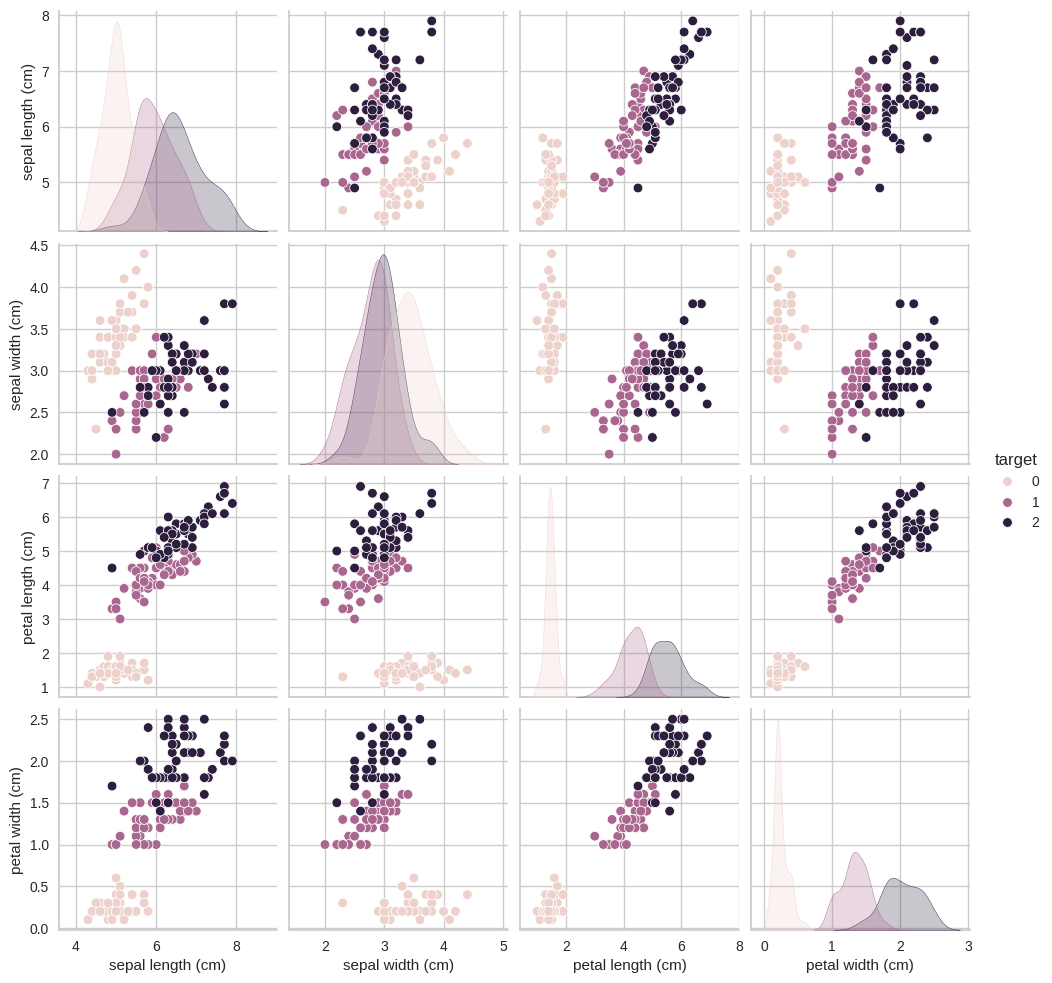

In [97]:
# 绘制特征之间的关系（成对关系图）
sns.pairplot(data, hue='target')
plt.show()

**分类可分性：**

从图中可以看到，不同种类的鸢尾花（Setosa, Versicolor, Virginica）在某些特征组合上有明显的分离。
尤其是在花瓣长度（petal length）和花瓣宽度（petal width）的散点图中，Setosa（目标值为0）与其他两类花卉（目标值为1和2）明显分离开来。
Versicolor（目标值为1）和Virginica（目标值为2）在花瓣特征上的分离较为明显，但在花萼特征上（例如花萼长度和花萼宽度）有部分重叠。

**对角线上的图是单一特征的分布情况（密度图）。**

Setosa在花瓣长度和花瓣宽度上的分布与其他两类明显不同，其花瓣长度较短，花瓣宽度也较窄。
花萼宽度的分布中，Versicolor和Virginica有一定的重叠，但在花萼长度上，Virginica的分布整体偏长。

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


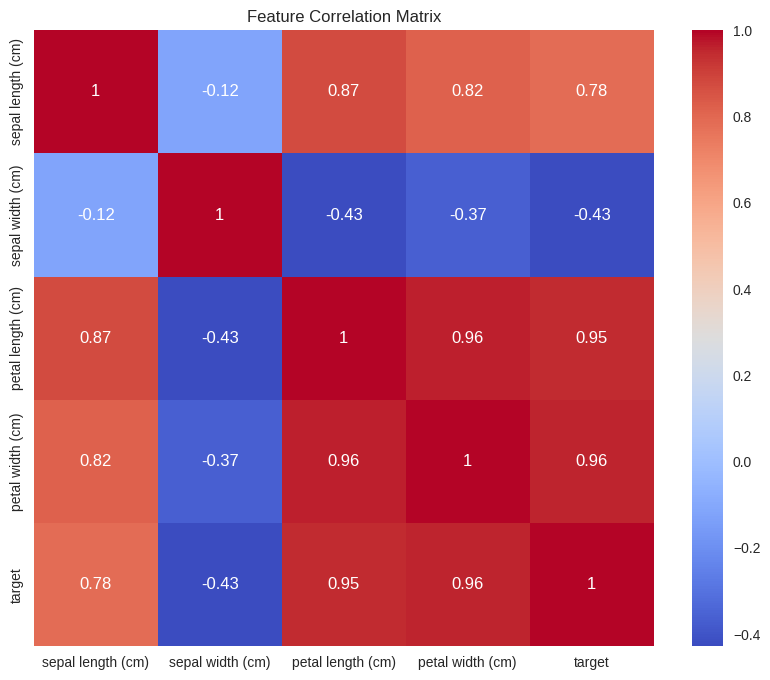

In [98]:
# 计算特征之间的相关系数矩阵
corr_matrix = data.corr()
print(corr_matrix)

# 绘制热力图显示相关系数矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

<Axes: xlabel='petal width (cm)', ylabel='Count'>

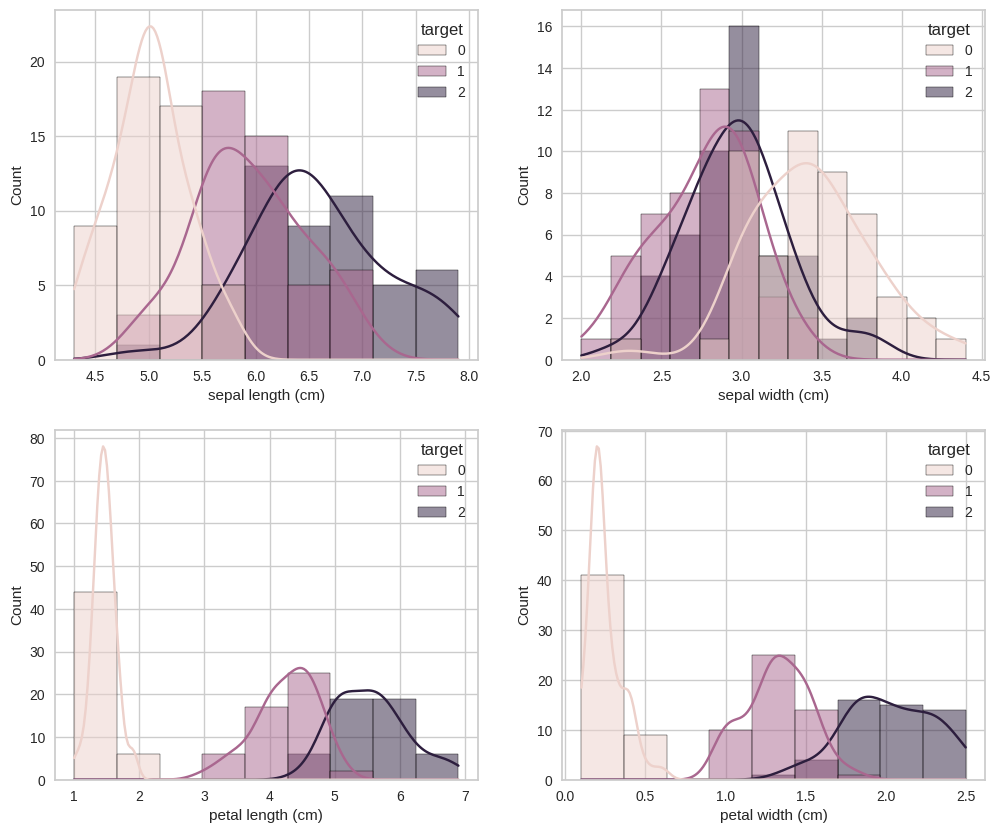

In [99]:
# 绘制每个特征的分布情况
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data, x='sepal length (cm)', hue='target', kde=True, ax=axes[0, 0])
sns.histplot(data, x='sepal width (cm)', hue='target', kde=True, ax=axes[0, 1])
sns.histplot(data, x='petal length (cm)', hue='target', kde=True, ax=axes[1, 0])
sns.histplot(data, x='petal width (cm)', hue='target', kde=True, ax=axes[1, 1])

1. 花萼长度（sepal length）：

Setosa（类别0）主要集中在4.5到5.5厘米之间，有一个明显的峰值。
Versicolor（类别1）和Virginica（类别2）的分布有较大的重叠，但总体上，Virginica的花萼长度更长，分布范围在5.5到7.5厘米之间。

2. 花萼宽度（sepal width）：

Setosa（类别0）在花萼宽度上分布较广，主要集中在3到4厘米之间。
Versicolor（类别1）的分布较集中在2.5到3厘米之间。
Virginica（类别2）则相对分布较为分散，但主要集中在2.5到3.5厘米之间。

3. 花瓣长度（petal length）：

Setosa（类别0）的花瓣长度明显较短，主要集中在1到2厘米之间。
Versicolor（类别1）和Virginica（类别2）的分布几乎不重叠，Versicolor主要集中在3到5厘米之间，而Virginica则在4.5到7厘米之间。

4. 花瓣宽度（petal width）：

Setosa（类别0）的花瓣宽度分布集中在0.1到0.6厘米之间。
Versicolor（类别1）主要集中在1到1.8厘米之间。
Virginica（类别2）的花瓣宽度主要集中在1.5到2.5厘米之间。
**总结**

Setosa：在所有特征上都有明显的分离，尤其在花瓣长度和宽度上。
Versicolor和Virginica：在花萼特征上有部分重叠，但在花瓣特征上有较好的分离。

# KNN 分类

In [57]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [55]:
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据

In [73]:
# 创建DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# # 保存为CSV文件
df.to_csv('iris_data.csv', index=False)

In [47]:
# 数据预处理
scaler = StandardScaler()  # 标准化缩放器
X = scaler.fit_transform(X)  # 对特征数据进行标准化

In [54]:
# 划分数据集
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3333, random_state=42)  # 训练集和临时集
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 验证集和测试集

# 创建KNN分类器
knn = KNeighborsClassifier(n_neighbors=5)  # 使用5个邻居

In [52]:
# 训练模型
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [53]:
# 验证模型
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100}%')

# 测试模型
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100}%')

Validation Accuracy: 97.2972972972973%
Test Accuracy: 100.0%


# 多层感知机用于分类

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

## 数据集的加载

In [22]:
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [23]:
# 加载鸢尾花数据集
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=6)

## 数据预处理 & 特征工程

In [24]:
# 数据预处理
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

## 数据集划分

In [25]:
# 划分数据集
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 转换为Tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# 创建数据加载器
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

## 模型定义

In [26]:
# 定义神经网络模型
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 创建模型、定义损失函数和优化器
model = IrisNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 训练模型

In [39]:
# 训练模型
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=50):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        val_loss = 0.0
        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Val Acc: {100 * correct / total}%')

# 训练模型
train_model(model, criterion, optimizer, train_loader, val_loader)

Epoch 1/100, Loss: 0.1523802684886115, Val Loss: 0.08350669406354427, Val Acc: 100.0%
Epoch 2/100, Loss: 0.15455291313784464, Val Loss: 0.08282907120883465, Val Acc: 100.0%
Epoch 3/100, Loss: 0.15066695639065333, Val Loss: 0.08323522843420506, Val Acc: 100.0%
Epoch 4/100, Loss: 0.1532581586922918, Val Loss: 0.08212408237159252, Val Acc: 100.0%
Epoch 5/100, Loss: 0.15699107838528498, Val Loss: 0.0816647969186306, Val Acc: 100.0%
Epoch 6/100, Loss: 0.16245642836604798, Val Loss: 0.08188182674348354, Val Acc: 100.0%
Epoch 7/100, Loss: 0.1522314931665148, Val Loss: 0.08233487978577614, Val Acc: 100.0%
Epoch 8/100, Loss: 0.15196692198514938, Val Loss: 0.07842127606272697, Val Acc: 100.0%
Epoch 9/100, Loss: 0.1517297476530075, Val Loss: 0.0758703276515007, Val Acc: 100.0%
Epoch 10/100, Loss: 0.15125041135719844, Val Loss: 0.07723659090697765, Val Acc: 100.0%
Epoch 11/100, Loss: 0.1464623904653958, Val Loss: 0.07705041207373142, Val Acc: 100.0%
Epoch 12/100, Loss: 0.14268528244325093, Val Los

In [35]:
# 测试模型
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        # print(f"labels:{labels}")
        # print(f"predicted：{predicted}")
        # print("-"*20)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 100.0%


# 机器学习杀器

In [ ]:
!pip install pycaret

In [36]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
from pycaret.classification import *
s = setup(data, target = 'species', session_id = 123)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [10]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0480
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0510
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0620
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0340
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.4070
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0350
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.1580
gbc,Gradient Boosting Classifier,0.9355,0.0000,0.9355,0.9416,0.9325,0.9023,0.9083,0.2800
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0360
rf,Random Forest Classifier,0.9264,0.9909,0.9264,0.9343,0.9232,0.8886,0.8956,0.3400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [4]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.8470
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0380
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0340
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2260
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0630
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.1740
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1310
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.3190
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0370
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,1.1040


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.0940
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0330
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0340
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2260
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0340
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.1780
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1300
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.3180
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0320
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,1.0720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# functional API
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…